# Assignment #1: Data Analytics and Data Driven Decisions

*Student:* Ivan Mykhailiuk

*email:* ivan.mykhailiuk@intermaths.eu)

## Task 1. 
The dataset has been imported and checked for the validity using pandas dataframe ```isnull()``` method.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline


dataframe = pd.read_csv('dataset-assignment.csv', sep=';')

if not dataframe.isnull().values.any():
    print ("Data Frame is OK!")
else:
    print ("One or more NaN's occurred! Needs cleaning.")

Data Frame is OK!


The ***descriptive statistics*** is provided by utilizing the pandas dataframe ```describe() ``` method.

In [2]:
dataframe.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
A,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
T,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
S,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000
R,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
H,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
F,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
Q,4898.0,5.877909,0.885639,3.00000,5.000000,6.00000,6.0000,9.00000
P,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
D,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
L,4898.0,10.514267,1.230621,8.00000,9.500000,10.40000,11.4000,14.20000


Frequency ***histograms*** & ***boxplots*** for each variable.

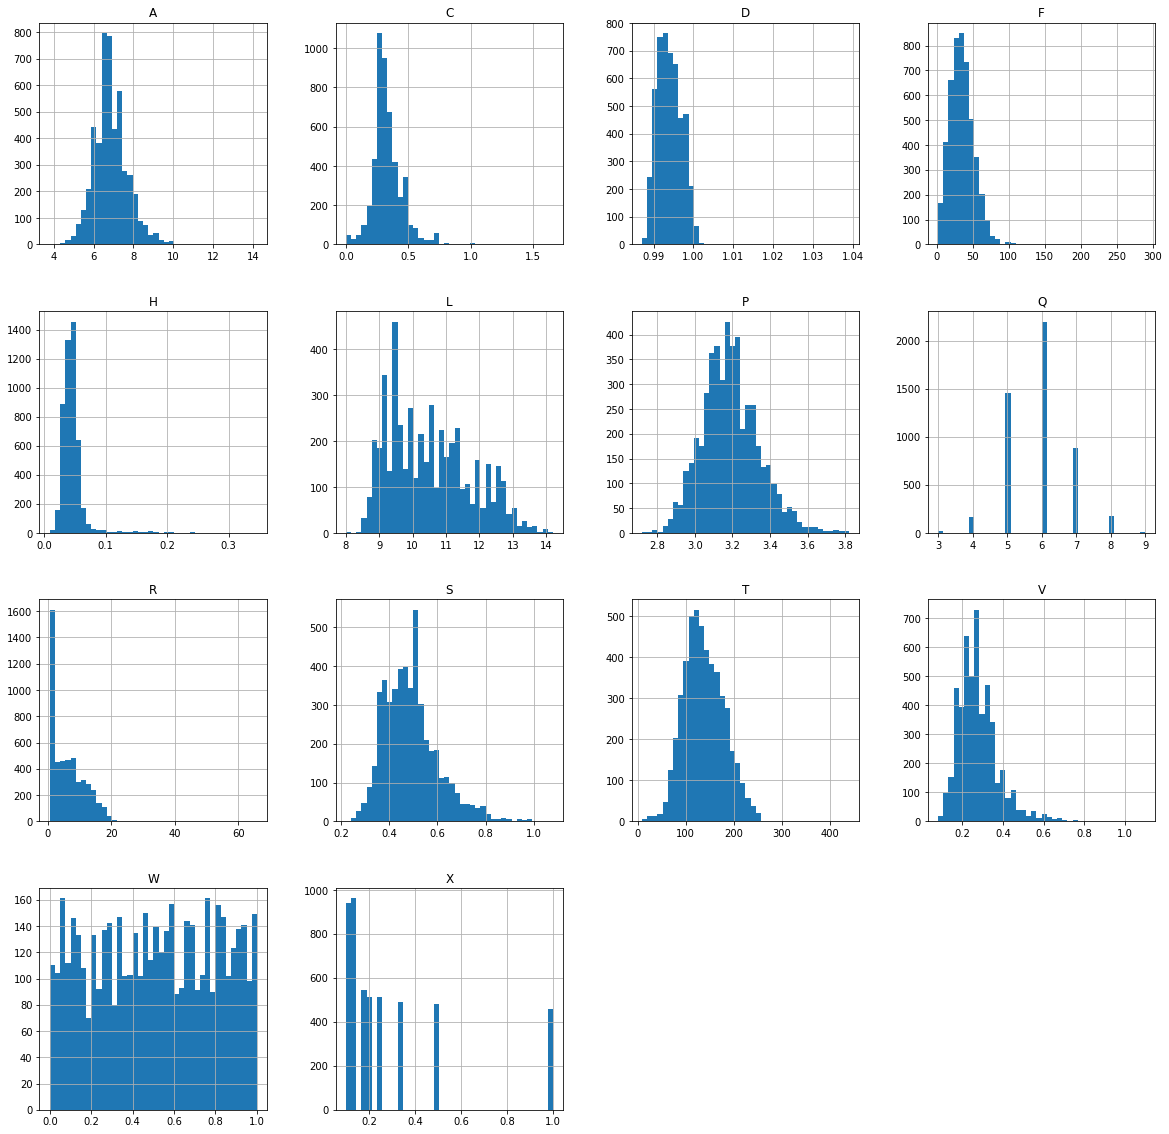

In [3]:
dataframe.hist(bins=40, figsize=(20,20));

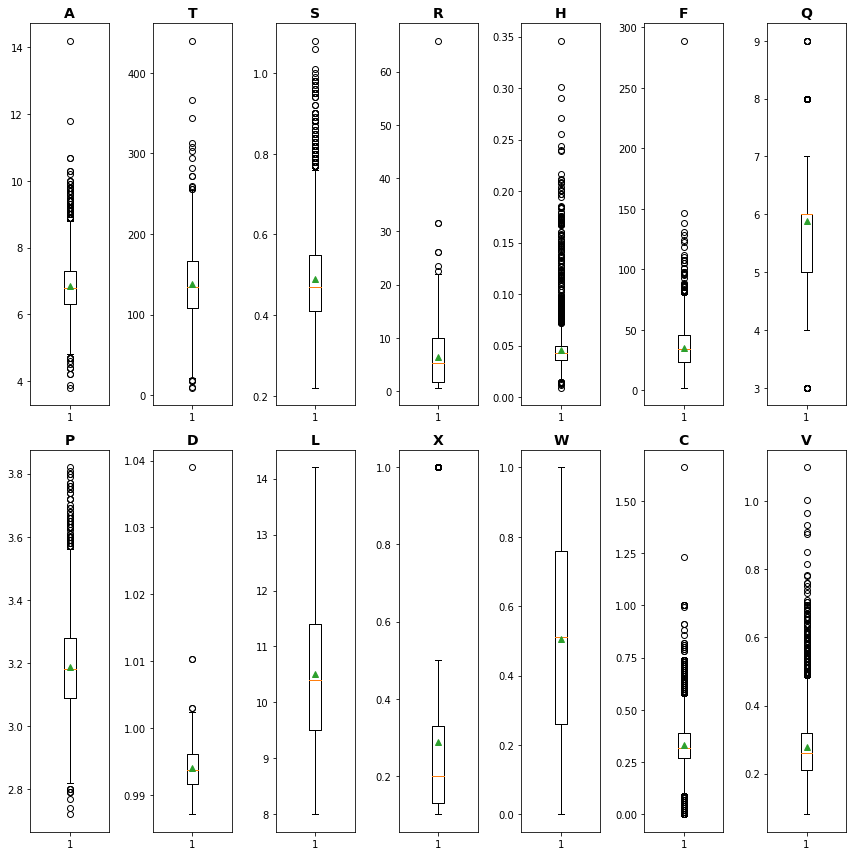

In [4]:
dfcols = dataframe.columns

nrows = 2
ncols = (len(dfcols) + 1) // 2

f, axs = plt.subplots(nrows = nrows, ncols = ncols, figsize = (12,12));

for i in range(nrows):
    for j in range(ncols):
        col = dfcols[i * ncols + j]
        axs[i, j].set_title(str(col), fontweight="bold", size=14)
        axs[i, j].boxplot(dataframe[col], showmeans='True', vert=True)

plt.tight_layout();

The following code defines a function for plotting ***the correlation matrix***:

In [5]:
def plotCorrMatrix(correlations):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    fig.colorbar(ax.matshow(correlations, vmin=-1, vmax=1))

    ticks = np.arange(0,len(correlations.columns),1)
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)

    names = list(correlations.columns)
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    
    plt.show();

We plot the correlation matrix and determine ***three most correlated variables***... 

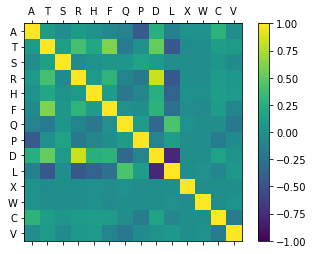

Three most correlated variables are: 
T  F    0.615501
L  D    0.780138
R  D    0.838966
dtype: float64


In [6]:
correlations = dataframe.corr();
plotCorrMatrix(correlations);

nVars = len(dataframe.columns)

sortedCorrs = \
    correlations.abs() \
    .unstack() \
    .sort_values()

        
print("Three most correlated variables are: \n" \
      + str(sortedCorrs.iloc[-nVars -6: -nVars: 2]))

... and plot for them ***corresponding scatterplots***:

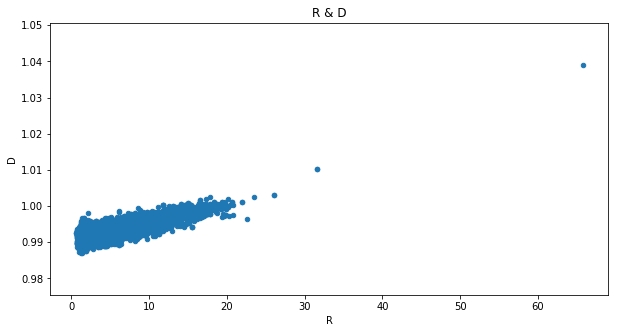

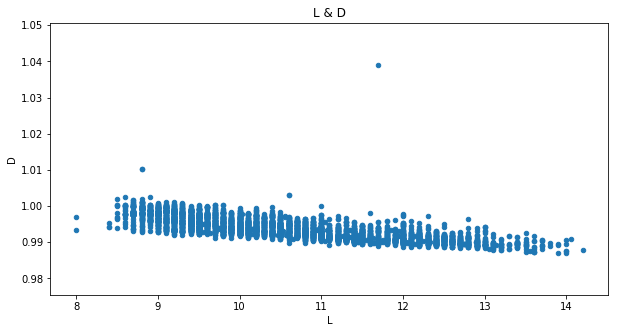

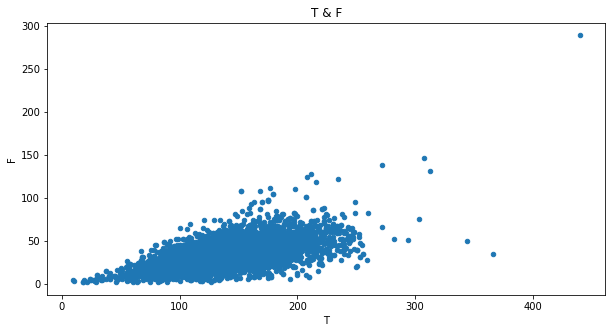

In [7]:
variables = [
    ('R', 'D'), 
    ('L', 'D'), 
    ('T', 'F')];

for v in variables:
    title = str(v[0] + ' & ' + v[1])
    dataframe.plot.scatter(v[0], v[1], title = title, figsize = (10,5));

## Taks 2.
***Sample means*** and ***sample standard deviations*** for all the variables are computed and arranged in a table:

In [8]:
print ('Sample mean and standart deviation for all variables:')

for col in dataframe.columns:
    mean = dataframe[col].mean();
    std = dataframe[col].std();
    print('  \"' + str(col) + \
          '\"-  mean = ' + "{:8.4f}".format(mean) + \
          ',   std = ' + "{:8.4f}".format(std) )

Sample mean and standart deviation for all variables:
  "A"-  mean =   6.8548,   std =   0.8439
  "T"-  mean = 138.3607,   std =  42.4981
  "S"-  mean =   0.4898,   std =   0.1141
  "R"-  mean =   6.3914,   std =   5.0721
  "H"-  mean =   0.0458,   std =   0.0218
  "F"-  mean =  35.3081,   std =  17.0071
  "Q"-  mean =   5.8779,   std =   0.8856
  "P"-  mean =   3.1883,   std =   0.1510
  "D"-  mean =   0.9940,   std =   0.0030
  "L"-  mean =  10.5143,   std =   1.2306
  "X"-  mean =   0.2877,   std =   0.2559
  "W"-  mean =   0.5068,   std =   0.2908
  "C"-  mean =   0.3342,   std =   0.1210
  "V"-  mean =   0.2782,   std =   0.1008


## Task 3.
The function ``` myConfidenceInterval() ``` computes ***the confidence interval*** for the mean of normally distributed population for the sample length ***more than 30 entries*** with accuracy *alpha*: 

In [9]:
def myConfidenceInterval(sample, alpha):
     # Some critical values for (alpha %) accuracy.
    z5Crit = 1.960
    z1Crit = 2.576
    
    if len(sample) < 30:
        print ("Sorry, the sample size is too small.")
        return None
    else:
        n = len(sample)
        m = sample.mean()
        s = np.sqrt(np.sum((sample - m)**2) / (n - 1))

        if np.isclose(alpha, 0.05):
            crit = z5Crit
        elif np.isclose(alpha, 0.01):
            crit = z1Crit
        else:
            print ("Sorry, accuracy alpha = " + str(alpha) + \
                   " is not available. Try alpha = 0.05 or 0.01.")
            return None
        
        return (m - crit * (s/np.sqrt(n)), m + crit * (s/np.sqrt(n)))

## Task 4.
The computed confidence intervals with accuracy ```alpha = 5 %``` and ```alpha = 1 %``` are| provided and compared to once obtained by use of corresponding *scipy* methods:

In [10]:
print ("Confidence intervals for each variable:")

for alpha in [0.05, 0.01]:
    print ("  For alpha = " + str(alpha))
    for col in dataframe.columns:
        sample = dataframe[col]
        
        myInt = myConfidenceInterval(sample, alpha)
        scipyInt = stats.t.interval(1 - alpha, len(sample)-1, \
                 loc=sample.mean(), scale=stats.sem(sample))
        
        strformat = "( {:9.5f}, {:9.5f} )"
        print('    \"' + str(col) + \
              '\"-  my ans = ' + strformat.format(myInt[0], myInt[1]) + \
              '\"    scipy ans = ' + strformat.format(scipyInt[0], scipyInt[1]) )
    print()

Confidence intervals for each variable:
  For alpha = 0.05
    "A"-  my ans = (   6.83115,   6.87842 )"    scipy ans = (   6.83115,   6.87843 )
    "T"-  my ans = ( 137.17047, 139.55085 )"    scipy ans = ( 137.17020, 139.55112 )
    "S"-  my ans = (   0.48665,   0.49304 )"    scipy ans = (   0.48665,   0.49304 )
    "R"-  my ans = (   6.24937,   6.53346 )"    scipy ans = (   6.24934,   6.53349 )
    "H"-  my ans = (   0.04516,   0.04638 )"    scipy ans = (   0.04516,   0.04638 )
    "F"-  my ans = (  34.83179,  35.78438 )"    scipy ans = (  34.83168,  35.78449 )
    "Q"-  my ans = (   5.85311,   5.90271 )"    scipy ans = (   5.85310,   5.90272 )
    "P"-  my ans = (   3.18404,   3.19250 )"    scipy ans = (   3.18404,   3.19250 )
    "D"-  my ans = (   0.99394,   0.99411 )"    scipy ans = (   0.99394,   0.99411 )
    "L"-  my ans = (  10.47980,  10.54873 )"    scipy ans = (  10.47979,  10.54874 )
    "X"-  my ans = (   0.28055,   0.29488 )"    scipy ans = (   0.28055,   0.29488 )
    "W

## Task 5.
We determine the variable with ***the largest variation coefficient***...

In [11]:
def varCoef(col):
    return (df[col].std() / df[col].mean())

df = dataframe
targetCol = max(df.columns, key = lambda col: varCoef(col))

print ("The variable with the largest variation coefficient is \n\'" + \
      targetCol + "\' with v. c. = {:5.5f}".format(varCoef(targetCol)))

The variable with the largest variation coefficient is 
'X' with v. c. = 0.88929


...and compute ***the empirical confidence intervals*** for the population mean and the population median using ***the resampling with bootstrap*** with ```alpha = 1%```:

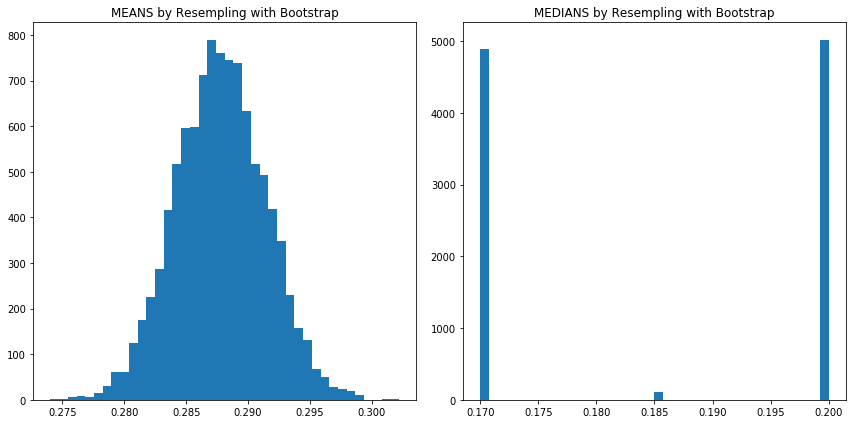

In [12]:
col = targetCol
means = []
medians = []

for i in range(10000):
    s = np.random.choice(
        dataframe[col], size = len(dataframe[col]), replace = True)
    means.append(s.mean())
    medians.append(np.median(s))
    
f, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (12,6));

nbins = 40

axs[0].set_title("MEANS by Resempling with Bootstrap")
axs[0].hist(means, bins = nbins)

axs[1].set_title("MEDIANS by Resempling with Bootstrap")
axs[1].hist(medians, bins = nbins)

plt.tight_layout();

In [13]:
alpha = 1
alphahalf = alpha / 2
lower = alphahalf
upper = 100 - alphahalf

estMean = dataframe[col].mean()
estMedian = dataframe[col].median()

meanConfInt = (np.percentile(means,lower), np.percentile(means,upper))
medianConfInt = (np.percentile(medians,lower), np.percentile(medians,upper))

intFormat = "( {0:4.5f}, {1:4.5f} ),  estimate value is {2:4.5f}"

print (("By use of resempling with bootstrap (alpha = {0:1.0f} %) " + \
       "we obtained the empirical confidence intervals:").format(alpha))

print (("  - for mean: " + intFormat)
       .format(meanConfInt[0], meanConfInt[1], estMean)) 

print (("  - for median: " + intFormat)
       .format(np.percentile(medians,lower), np.percentile(medians,upper), estMedian))

By use of resempling with bootstrap (alpha = 1 %) we obtained the empirical confidence intervals:
  - for mean: ( 0.27848, 0.29739 ),  estimate value is 0.28772
  - for median: ( 0.17000, 0.20000 ),  estimate value is 0.20000


## Task 6.
Finally, we test ***the hypothesis H0*** that the population mean is equal to the sample median with precision ```alpha = 1%```:

In [14]:
mu0 = dataframe[col].median()
ans = None

if (meanConfInt[0] < mu0 < meanConfInt[1]):
    ans = "ACCEPT"
else:
    ans = "REJECT"
    
print ("We {0} hypotesis H0: the population mean is equal to sample median = {1:4.5f}" \
       .format(ans, mu0))

We REJECT hypotesis H0: the population mean is equal to sample median = 0.20000
